# Assignemnt 3

In [1]:
import cv2
import os
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import numpy as np
from PIL import Image


cwd = os.getcwd()

# read in images
circuit = cv2.imread(cwd + '/Circuit.jpg',0)
moon = cv2.imread(cwd + '/Moon.jpg',0)
rice = cv2.imread(cwd + '/Rice.jpg',0)

# convert Text.gif using PIllow since cv2 does not support gif
im_text = Image.open(cwd + '/Text.gif')
greyscale_im_text = im_text.convert('L')
greyscale_im_text.save(cwd + '/Text.jpg')

im_text1 = Image.open(cwd + '/Text1.gif')
greyscale_im_text1 = im_text1.convert('L')
greyscale_im_text1.save(cwd + '/Text1.jpg')



text = cv2.imread(cwd + '/Text.jpg',0)
text1 = cv2.imread(cwd + '/Text1.jpg',0)



## Problem 1

Exercises on Low-pass and High-pass Filters in the Spatial Domain [Total: 15 points]
Note: If boundary extension is needed, please pad the boundary with 0’s. Your functions should accommodate
any square filter with an odd number of rows and columns

### 1
Implement an AverageFiltering function to perform a filtering operation (i.e., convolution operation), as
explained in class, on the input image. This function has two input parameters im and mask, where im is the
original grayscale image and mask is the square filter with an odd number of rows and columns. Make sure
that your function shows appropriate error messages when the mask does not possess the three properties of
the low-pass filter (i.e., all elements in the mask are positive, the sum of all elements is 1, and the elements are
symmetric around the center). Note: Both input and output images of the AverageFiltering function should
be an array with the same size and the same data type uint8. You are NOT allowed to call any built-in filtering
or convolution functions.
Call AverageFiltering function to process the noisy image Circuit using a standard 5×5 averaging filter and
a weighted 3×3 averaging filter, respectively. Display the original image and two processed images in Figure
1 with appropriate titles

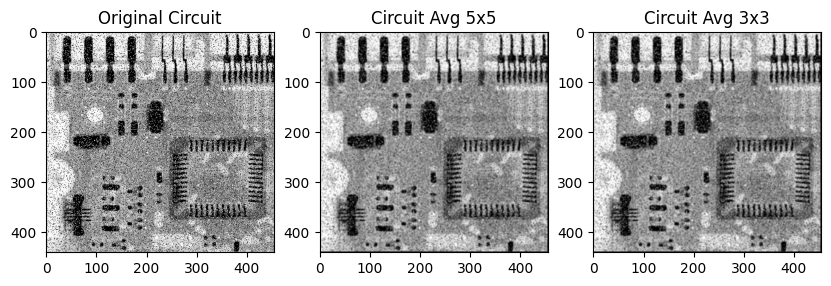

In [2]:
def averaging_filter(img, mask):

    # print warning if the mask is not square and not odd
    if mask.shape[0] != mask.shape[1]:
        print('Warning: mask is not square')
        return
    if mask.shape[0] % 2 == 0:
        print('Warning: mask is not odd')
        return
    # print warning if all mask elements aren't positive
    if np.any(mask < 0):
        print('Warning: mask contains negative elements')
        return
    # print warning if the sum of mask elements is 1
    if np.sum(mask) != 1:
        print('Warning: sum of mask elements is 1')
        return
    # print warnin if the elements in the mask are not semestric about the center
    if np.any(mask != mask[::-1, ::-1]):
        print('Warning: mask is not symmetric about the center')
        return
    

    width, height = img.shape[0], img.shape[1]
    
    img_new = np.zeros([width, height])

    for i in range(1, width -1):
        for j in range(1, height-1):
            temp = img[i-1, j-1]*mask[0, 0]+img[i-1, j]*mask[0, 1]+img[i-1, j + 1]*mask[0, 2]+img[i, j-1]*mask[1, 0]+ img[i, j]*mask[1, 1]+img[i, j + 1]*mask[1, 2]+img[i + 1, j-1]*mask[2, 0]+img[i + 1, j]*mask[2, 1]+img[i + 1, j + 1]*mask[2, 2] 
            img_new[i, j]= temp
    return img_new


# process the Circuit image with a standard 5x5 averaging filter
mask = np.ones((5,5)) / 25
circuit_avg_5x5 = averaging_filter(circuit, mask)



# 3 by 3 averaging filter
mask = np.ones((3,3)) / 9
circuit_avg_3x3 = averaging_filter(circuit, mask)


# display the original and the circuit_avg_5x5 image and the circuit_avg_3x3 image side by side
fig = plt.figure(figsize=(10, 10))
gs = GridSpec(1, 3, figure=fig)
ax1 = fig.add_subplot(gs[0, 0])
ax1.imshow(circuit,cmap='gray')
ax1.set_title('Original Circuit')
ax2 = fig.add_subplot(gs[0, 1])
ax2.imshow(circuit_avg_5x5,cmap='gray')
ax2.set_title('Circuit Avg 5x5')
ax3 = fig.add_subplot(gs[0, 2])
ax3.imshow(circuit_avg_3x3,cmap='gray')
ax3.set_title('Circuit Avg 3x3')
plt.show()





    

### 2

// my note - no convulution needed

Implement a MedianFiltering function to perform a filtering operation, as explained in class, on the input
image. This function has two input parameters im and mask, where im is the original grayscale image and
mask is the square filter with an odd number of rows and columns. Make sure that your function shows
appropriate error messages when any of the elements in the mask are not positive integers. Note: Both input
and output images of the MedianFiltering function should be an array with the same size and the same data
type uint8. You are NOT allowed to call any built-in median filtering functions.
Call this function to process the same noisy image Circuit using a standard 3×3 median filter and a weighted
3×3 median filter M = [1 2 1 ; 2 4 2; 1 2 1], respectively. Display the original image and two processed
images in Figure 2 with appropriate titles.
Note: The standard median filter is a special kind of the weighted median filter. Each value in the median
filter indicates the number of copies of the corresponding masked value in the original image involved in the
standard median filtering

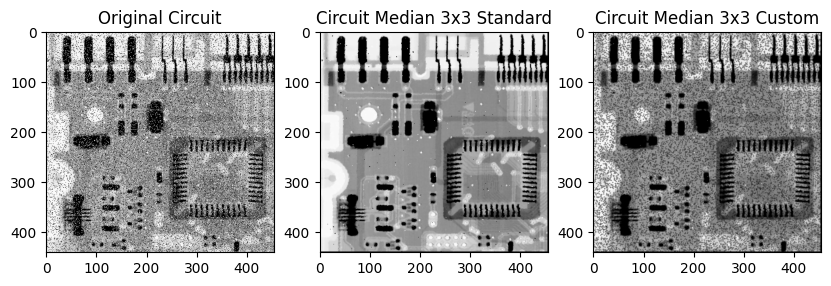

In [3]:
# median filter using the kernel size of 3x3 without built in function
def median_filter(img, mask):

            # print warning if the mask is not square and not odd
        if mask.shape[0] != mask.shape[1]:
                print('Warning: mask is not square')
                return
        if mask.shape[0] % 2 == 0:
                print('Warning: mask is not odd')
                return
        # print warning if all mask elements aren't positive
        if np.any(mask < 0):
                print('Warning: mask contains negative elements')
                return
        # print warning if the sum of mask elements is 1
        if np.sum(mask) == 1:
                print('Warning: sum of mask elements is 1')
                return
        # print warnin if the elements in the mask are not semestric about the center
        if np.any(mask != mask[::-1, ::-1]):
                print('Warning: mask is not symmetric about the center')
                return
    
        width, height = img.shape[0], img.shape[1]
        
        img_new = np.zeros([width, height])

        mask = mask/np.sum(mask)
    
        for i in range(1, width -1):
            for j in range(1, height-1):
                temp = [img[i-1, j-1]*mask[0, 0],img[i-1, j]*mask[0, 1],img[i-1, j + 1]*mask[0, 2],img[i, j-1]*mask[1, 0], img[i, j]*mask[1, 1],img[i, j + 1]*mask[1, 2],img[i + 1, j-1]*mask[2, 0],img[i + 1, j]*mask[2, 1],img[i + 1, j + 1]*mask[2, 2]]
                img_new[i, j]= np.median(temp)
        return img_new

                
# standard 3x3 median filter
mask = np.array([[1, 1, 1],
                 [1, 1, 1],
                 [1, 1, 1]])

circuit_median_3x3_standard = median_filter(circuit, mask)

custom_mask = np.array([[1, 2, 1],
                        [2, 4, 2],
                        [1, 2, 1]])

# custom 3x3 median filter
circuit_median_3x3_custom = median_filter(circuit, custom_mask)

# display the original and the circuit_median_3x3_standard image and the circuit_median_3x3_custom image side by side
fig = plt.figure(figsize=(10, 10))
gs = GridSpec(1, 3, figure=fig)
ax1 = fig.add_subplot(gs[0, 0])
ax1.imshow(circuit,cmap='gray')
ax1.set_title('Original Circuit')
ax2 = fig.add_subplot(gs[0, 1])
ax2.imshow(circuit_median_3x3_standard,cmap='gray')
ax2.set_title('Circuit Median 3x3 Standard')
ax3 = fig.add_subplot(gs[0, 2])
ax3.imshow(circuit_median_3x3_custom,cmap='gray')
ax3.set_title('Circuit Median 3x3 Custom')
plt.show()



### 3

Use the strong 3×3 Laplacian mask to filter the image Moon by calling an appropriate built-in function.
Use the formula Enhanced Image = Original Image + Filtered Image to get the final enhanced image (Hint:
2
This formula indicates that one of the two strong Laplacian masks should be used). Use imshow to display
four images including the original image, the filtered image (display it by setting the values larger than 255 as
255 and setting the values smaller than 0 as 0), the scaled filtered image whose intensities fall in the range of
[0, 255], and the enhanced image, in Figure 3 with appropriate titles (Refer to Figure 3.40 in the textbook or
the same figure on slide 57 of my notes)

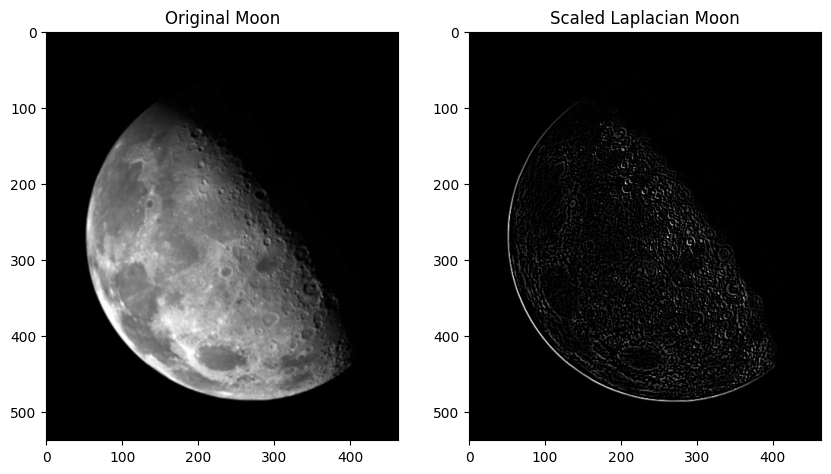

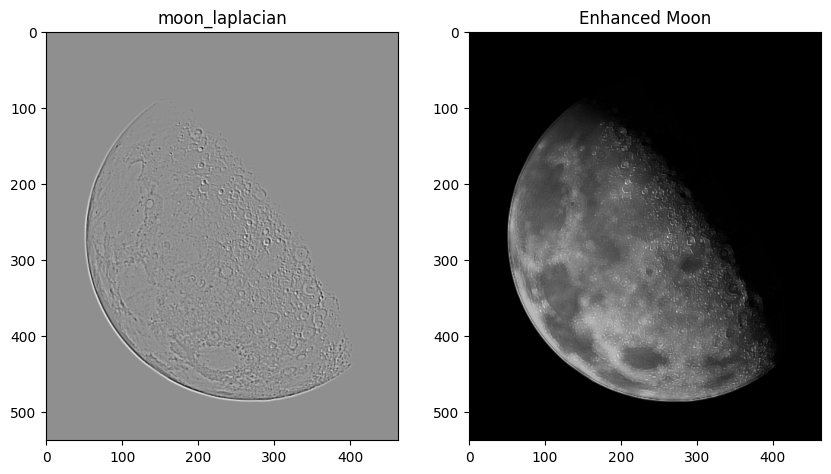

In [4]:
moon_laplacian = cv2.Laplacian(moon,cv2.CV_64F,ksize=3)
scaled_moon_laplacian = moon_laplacian.copy()
#setting the values larger than 255 as 255 and setting the values smaller than 0 as 0 
scaled_moon_laplacian[scaled_moon_laplacian > 255] = 255
scaled_moon_laplacian[scaled_moon_laplacian < 0] = 0


enhanced_image = moon + scaled_moon_laplacian


# display the original and the enhanced image side by side
fig = plt.figure(figsize=(10, 10))
gs = GridSpec(1, 2, figure=fig)
ax1 = fig.add_subplot(gs[0, 0])
ax1.imshow(moon,cmap='gray')
ax1.set_title('Original Moon')
ax2 = fig.add_subplot(gs[0, 1])
ax2.imshow(scaled_moon_laplacian ,cmap='gray')
ax2.set_title('Scaled Laplacian Moon')
plt.show()

# display the original and the enhanced image side by side
fig = plt.figure(figsize=(10, 10))
gs = GridSpec(1, 2, figure=fig)
ax1 = fig.add_subplot(gs[0, 0])
ax1.imshow(moon_laplacian,cmap='gray')
ax1.set_title('moon_laplacian')
ax2 = fig.add_subplot(gs[0, 1])
ax2.imshow(enhanced_image,cmap='gray')
ax2.set_title('Enhanced Moon')
plt.show()




## Problem II Problem II: Exercises on Edge Detectors in the Spatial Domain
Implement a FindEdgeInfo function to locate the important edges and compute the edge histogram of the
input image. This function has two input parameters im and bin, where im is the original grayscale image and
bin is the number of bins. It returns two outputs edges and edgeHist, where edges contains important edges in
the input image (i.e., im) and edgeHist contains the counts of the orientation (angles) of the edge in each bin,
which can be computed by:( )
yx GG /arctan=
 , where Gx is the gradient component produced by the
horizontal edge detector and Gy is the gradient component produced by the vertical edge detector (Refer to
slide 63 of my notes. Gx is the filter at left and Gy is the filter at right). You are NOT allowed to call any
built-in edge functions and histogram functions.
Call this function to compute a 30-bin edge histogram (e.g., dividing the entire range of edge orientations into
30 equal intervals and get the counts of angles falling in each interval) of the image Rice. Display the original
image, the image with the important edges, and the edge histogram in Figure 4 with appropriate titles. Note:
The entire range of the edge orientations should cover 360 degrees.

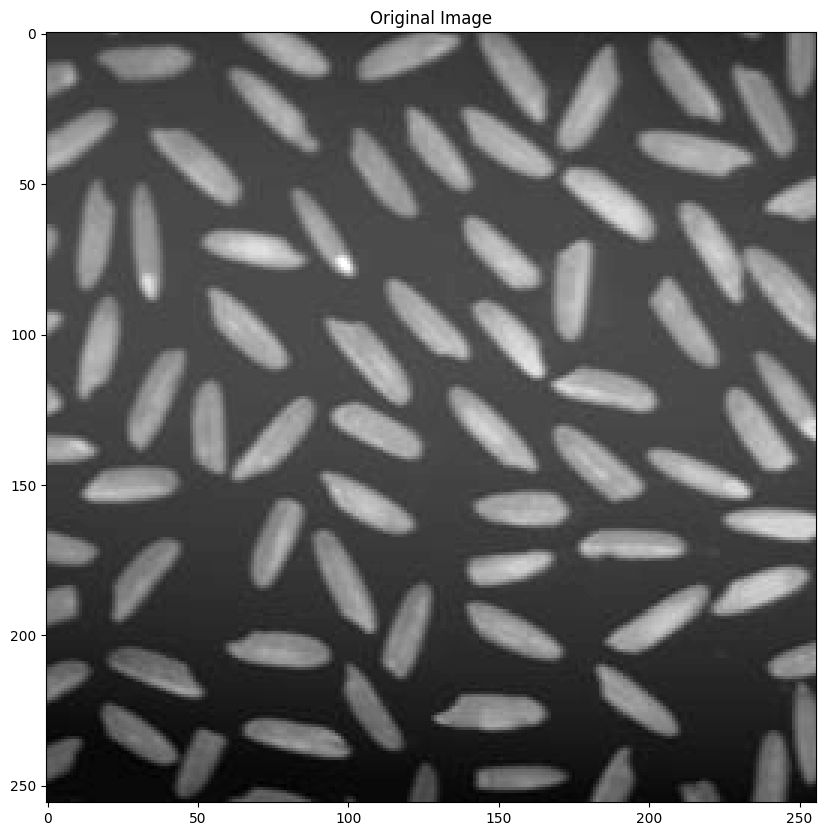

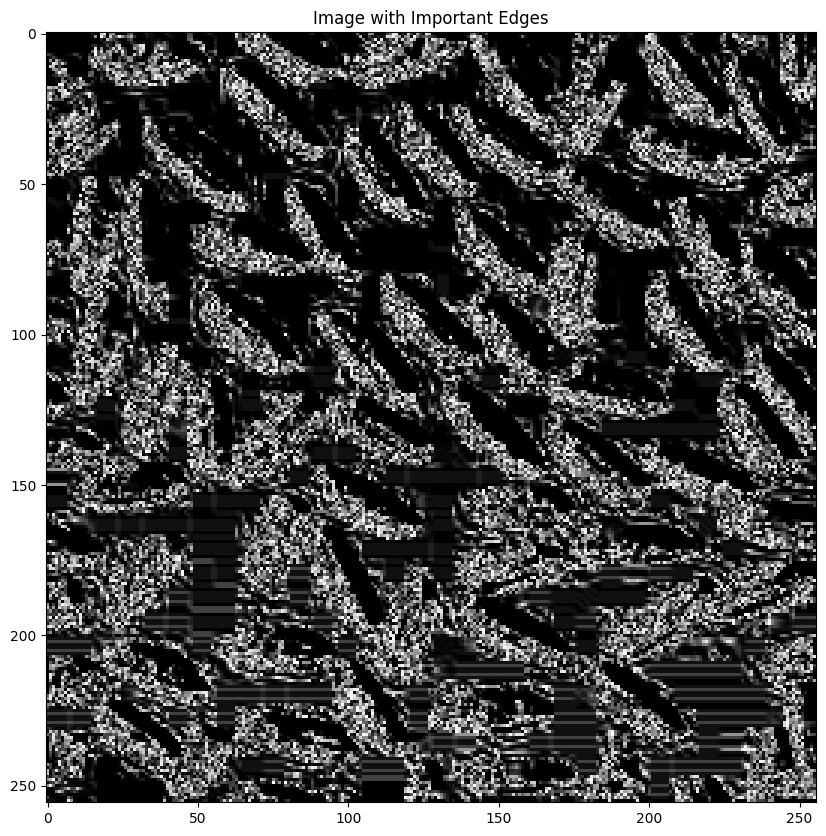

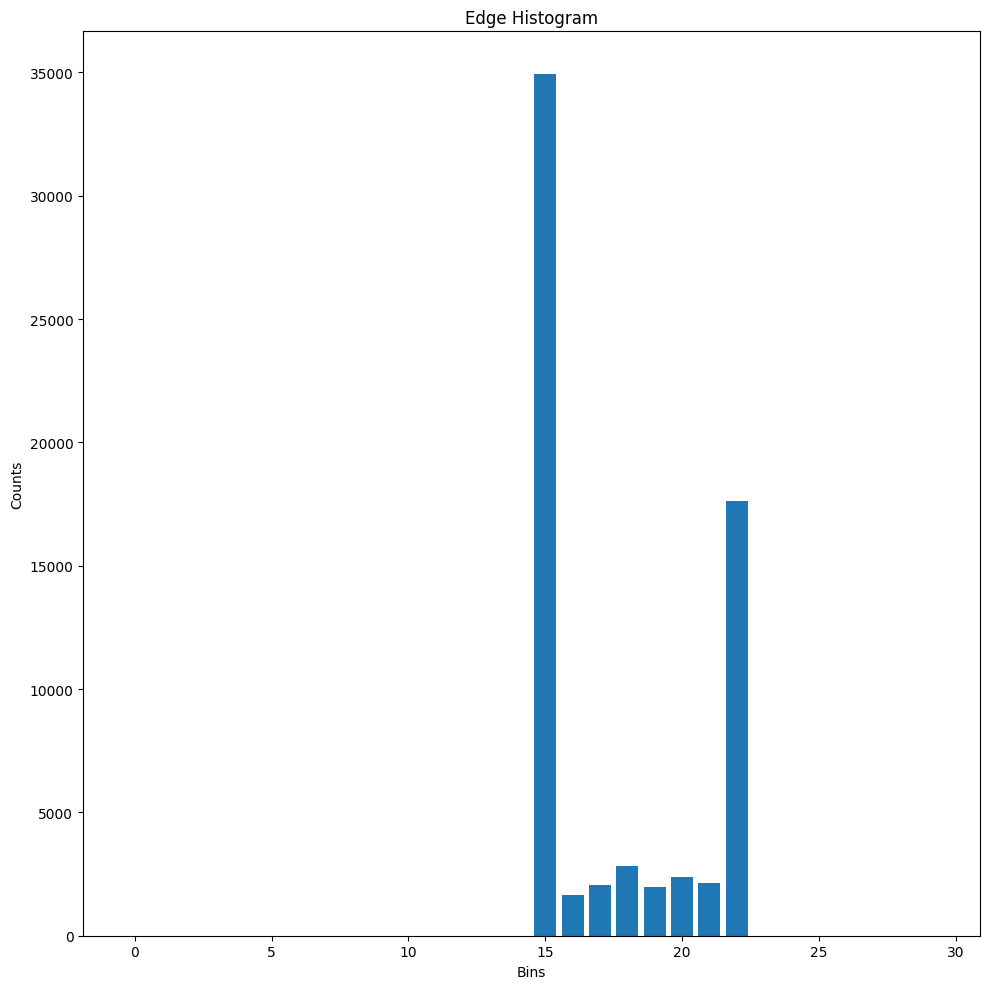

In [5]:
#FindEdgeInfo function to locate the important edges and compute the edge histogram of the input image. This function has two input parameters im and bin, where im is the original grayscale image and bin is the number of bins. It returns two outputs edges and edgeHist, where edges contains important edges in the input image (i.e., im) and edgeHist contains the counts of the orientation (angles) of the edge in each bin, which can be computed by:( ) yx GG /arctan=  , where Gx is the gradient component produced by the horizontal edge detector and Gy is the gradient component produced by the vertical edge detector
def CalculateGradients(im):
  # Sobel filters.
  sobelX = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
  sobelY = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])

  # Calculate the gradients.
  Gx = cv2.filter2D(im,-1,sobelX), 
  Gy = cv2.filter2D(im, -1, sobelY)

  return Gx, Gy



def FindEdgeInfo(im, bin):
    # compute the gradient components produced by the horizontal and vertical edge detectors
    Gx, Gy = CalculateGradients(im)
    
    Gx = np.array(Gx)
    Gy = np.array(Gy)

    # Calculate the gradient magnitude and orientation angle
    gradient_magnitude = Gx**2 + Gy**2
    # gradient_magnitude = np.sqrt(gradient_magnitude_squared)
    theta = np.arctan2(Gy, Gx)
    
    # Normalize the angles to [0, 2*pi]
    theta = (theta + np.pi) % (2 * np.pi)
    
    # Create bins for the histogram
    bin_edges = np.linspace(0, 2 * np.pi, bin + 1)
    
    # Initialize the edge histogram
    edge_hist = np.zeros(bin, dtype=int)
    
    # Calculate the histogram manually
    for i in range(bin):
        bin_mask = (theta >= bin_edges[i]) & (theta < bin_edges[i + 1])
        edge_hist[i] = np.sum(bin_mask)
    
    return gradient_magnitude, edge_hist



num_bins = 30

gradient_magnitude, edge_histogram = FindEdgeInfo(rice, num_bins)


plt.figure(figsize=(10, 10))
plt.imshow(rice, cmap='gray')
plt.title('Original Image')


plt.figure(figsize=(10, 10))
plt.imshow(gradient_magnitude[0], cmap='gray')
plt.title('Image with Important Edges')

plt.figure(figsize=(10, 10))
plt.bar(np.arange(num_bins), edge_histogram)
plt.xlabel('Bins')
plt.ylabel('Counts')
plt.title('Edge Histogram')
plt.tight_layout()
plt.show()








## Problem III: A Practical Problem
Use the techniques explained in class to get rid of the streaks (stripes) in the image “Text.gif”. Please write a
function “RemoveStripes” with the original grayscale image as the input and the cleaned grayscale image as
the output. Display the original, some important intermediate images or plots, and the “cleaned” image in a
few figures with appropriate titles. [10 points]
You may test your function RemoveStripes on Text1.gif to see whether it can get rid of its stripes. [2 points]


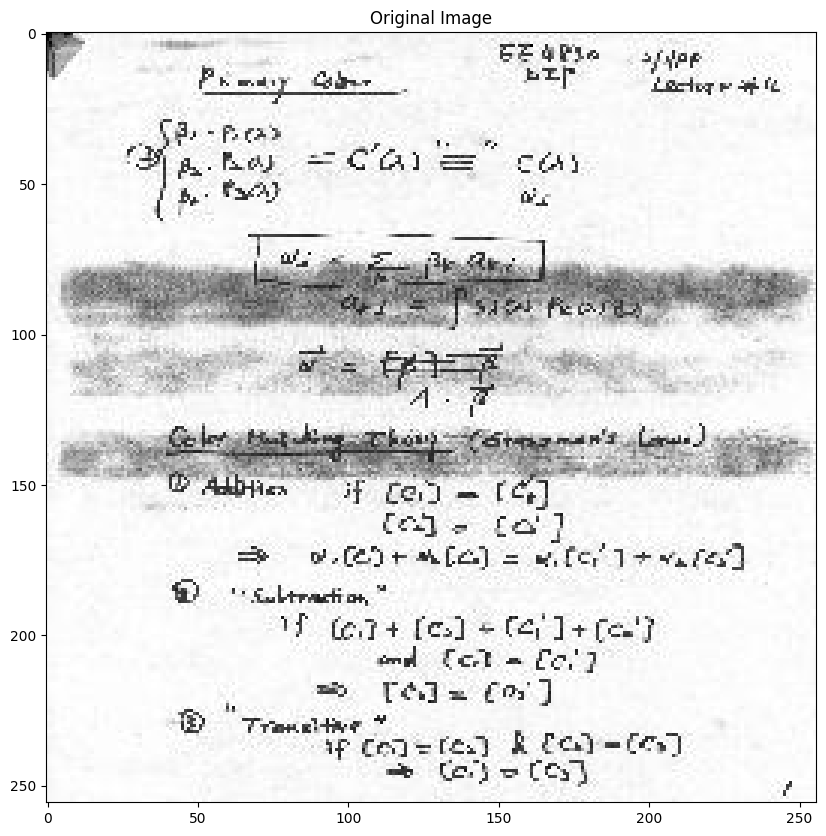

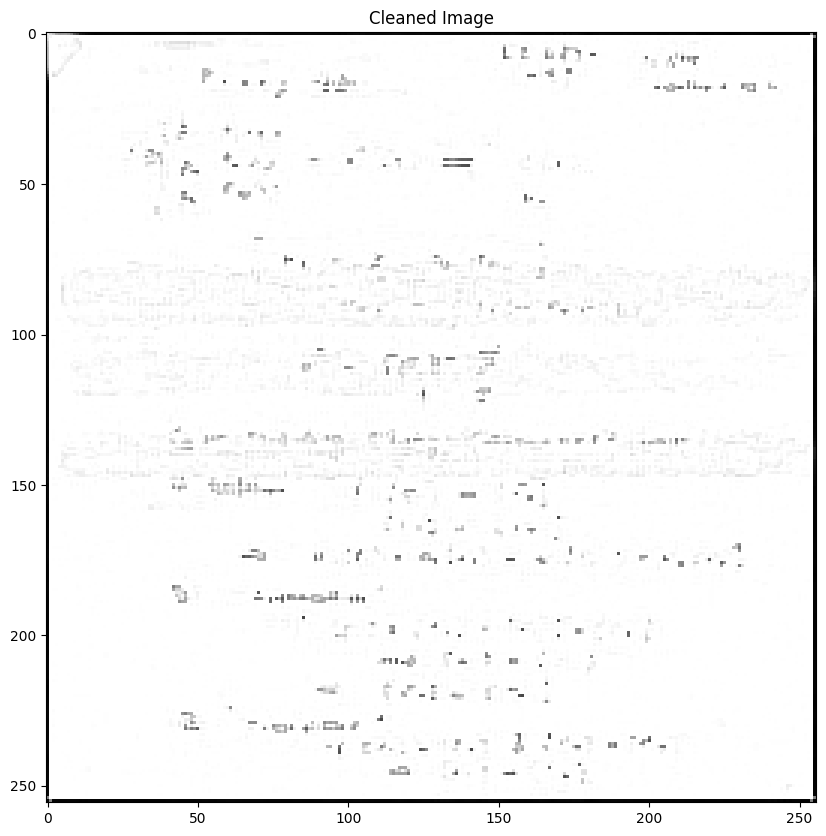

In [6]:
def RemoveStripes(img):
  meduim_mask = np.array([[1, 1, 1],
                 [1, 1, 1],
                 [1, 1, 1]])

  result_image = median_filter(img, meduim_mask)


  result_image = cv2.Laplacian(result_image,cv2.CV_64F,ksize=3)

  result_image[result_image > 255] = 255
  result_image[result_image < 0] = 0

  result_image = 255 - result_image
  return result_image

plt.figure(figsize=(10, 10))
plt.imshow(text, cmap='gray')
plt.title('Original Image')
plt.show()
text1_cleaned = RemoveStripes(text)

# Display the cleaned image
plt.figure(figsize=(10, 10))
plt.plot(122)
plt.imshow(text1_cleaned, cmap='gray')
plt.title('Cleaned Image')
plt.show()
